# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | This time British Airways ...
1,"✅ Trip Verified | The seats were excellent, ..."
2,✅ Trip Verified | After the nightmare of get...
3,✅ Trip Verified | Prior to boarding a gate a...
4,✅ Trip Verified | I flew from Amsterdam to L...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
df.tail()

,reviews
995,✅ Trip Verified | London to St Petersburgh. H...
996,✅ Trip Verified | Sydney to London via Singap...
997,Not Verified | London to Johannesburg. Britis...
998,✅ Trip Verified | I have to say travelling in ...
999,Not Verified | I had a stress free journey wi...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

Here begins the analysis for the project. The next couple of cells show customer reviews before they are cleaned for better analysis.

In [9]:
import re

In [10]:
# Function to remove both "✅ Trip Verified |" and "Not Verified |"
def clean_review(text):
    # Remove both "✅ Trip Verified |" and "Not Verified |"
    return re.sub(r'(✅ Trip Verified \| |Not Verified \| )', '', text)

# Apply the cleaning function to the "reviews" column
df['cleaned_reviews'] = df['reviews'].apply(clean_review)

# Display the cleaned DataFrame
print(df[['reviews', 'cleaned_reviews']])

                                               reviews  \
0    ✅ Trip Verified |   This time British Airways ...   
1    ✅ Trip Verified |   The seats were excellent, ...   
2    ✅ Trip Verified |   After the nightmare of get...   
3    ✅ Trip Verified |   Prior to boarding a gate a...   
4    ✅ Trip Verified |   I flew from Amsterdam to L...   
..                                                 ...   
995  ✅ Trip Verified |  London to St Petersburgh. H...   
996  ✅ Trip Verified |  Sydney to London via Singap...   
997  Not Verified |  London to Johannesburg. Britis...   
998  ✅ Trip Verified | I have to say travelling in ...   
999  Not Verified |  I had a stress free journey wi...   

                                       cleaned_reviews  
0    ✅ Trip Verified |   This time British Airways ...  
1      The seats were excellent, with a feel of muc...  
2      After the nightmare of getting through tripl...  
3      Prior to boarding a gate agent seemed to pic...  
4      I flew from

Next we have the customer reviews after cleaning them. 

In [12]:
df['cleaned_reviews'].head()

0    ✅ Trip Verified |   This time British Airways ...
1      The seats were excellent, with a feel of muc...
2      After the nightmare of getting through tripl...
3      Prior to boarding a gate agent seemed to pic...
4      I flew from Amsterdam to Las Vegas with a la...
Name: cleaned_reviews, dtype: object

Comments are now grouped together for analysis using TF-IDF

Topic 0:  good food really excellent aircraft overall comfortable quality experience quite
Topic 1:  number said help called booking phone told got just change
Topic 2:  class business rows middle lounge quality seating way food having
Topic 3:  minutes late plane gate boarding hour 30 15 passengers wait
Topic 4:  british airways airlines experience miles like madrid 19 way iberia
Topic 5:  customer service non tried existent contacted phone hours contact layover
Topic 6:  lounge quick fine time security arrival drinks breakfast t5 lhr
Topic 7:  ba airlines years better flying fly really trip cost low
Topic 8:  crew cabin aircraft flight friendly member nice wasn smooth journey
Topic 9:  economy premium leg better passengers upgrade plus room flight money
Topic 10:  luggage hand received days glasgow lost ryanair wet plane connecting
Topic 11:  meal water offered drink drinks small bottle food served glass
Topic 12:  travel booked cancel trip change year able march 2020 pandemic
Topic 

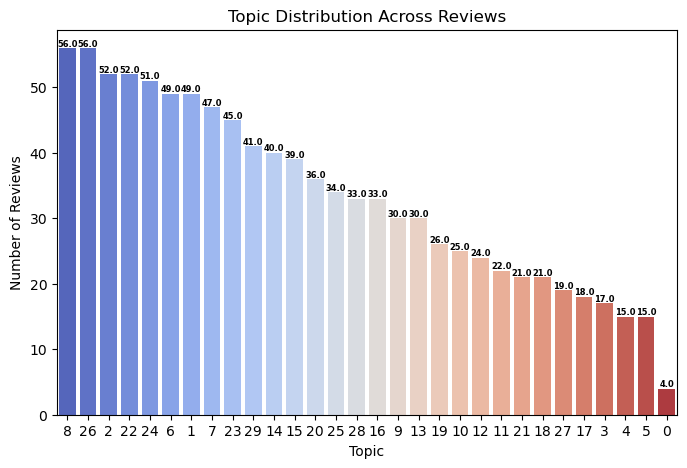

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Vectorize the cleaned reviews
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_reviews'])

# Step 2: Apply NMF
num_topics = 30  # You can adjust the number of topics
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

# Step 3: Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
def get_top_words(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}: ", " ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))

get_top_words(nmf_model, feature_names)

# Step 4: Assign topics to reviews
df['topic'] = nmf_topics.argmax(axis=1)

# Order topics by count (highest to lowest)
topic_order = df['topic'].value_counts().index

# Visualizing topic distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['topic'], palette="coolwarm", order=topic_order)

# Add labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=6, fontweight='bold')

plt.title("Topic Distribution Across Reviews")
plt.xlabel("Topic")
plt.ylabel("Number of Reviews")
plt.show()

Below is the sentiment analysis used to find positive, negative, and neutral reviews.

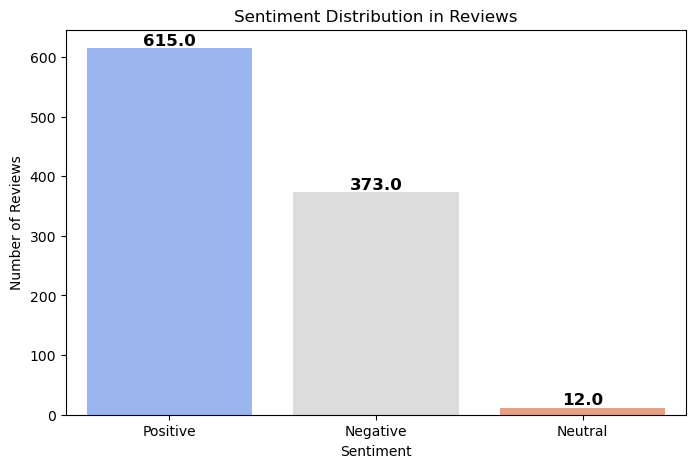

In [16]:
from textblob import TextBlob

# Function to get sentiment polarity (scale from -1 to 1)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the cleaned_reviews column
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

# Categorize sentiment
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['sentiment_label'], palette="coolwarm")
# Add labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.title("Sentiment Distribution in Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Save the figure before showing it
plt.savefig("sentiment_distribution.png", dpi=300, bbox_inches="tight")  # Exports as PNG

plt.show()

The below sentiment analysis includes the same bar graph along with some of the positive, negative, and neutral customer reviews. Use the scroll bar to view all. 

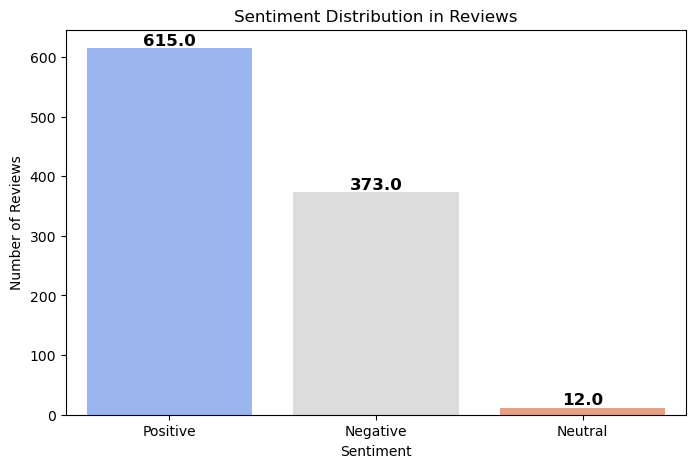


💚 **Positive Reviews:**
-  Very disappointing. I book BA so I can fly during the day. My return flight at 6pm on 28/1/23 was cancelled, replaced by a flight at 9pm. It took off 1/2 hour late meaning I arrived at Gatwick well after midnight with no onward transport connections. I had to pay £70 for a taxi home. Plus the seats are really snug. I’m only 5’7” but my knees were hitting the seat in front. No more BA for me. They are trading on their name but the customer service and reliability has deteriorated. Ryanair has better aircraft and take-off slots.
-  Flew to Barbados 16 March on BA 255 in the new Club Class suite. A huge improvement on the old yin and yang Club Class which we unfortunately endured on the way back. Comfortable, big TV screen with high quality picture and good headphones, plenty of nooks and crannies for storing small items and very private. Nice friendly FA's (called by my name from the off) and pretty good drinks service with a good dinner served. Once again let

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Function to get sentiment polarity (scale from -1 to 1)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the cleaned_reviews column
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

# Categorize sentiment
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['sentiment_label'], palette="coolwarm")

# Add labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Sentiment Distribution in Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

# Extract sample statements for each category
num_samples = 10 # Adjust as needed
positive_samples = df[df['sentiment_label'] == 'Positive']['cleaned_reviews'].sample(min(num_samples, len(df[df['sentiment_label'] == 'Positive'])), random_state=42).tolist()
negative_samples = df[df['sentiment_label'] == 'Negative']['cleaned_reviews'].sample(min(num_samples, len(df[df['sentiment_label'] == 'Negative'])), random_state=42).tolist()
neutral_samples = df[df['sentiment_label'] == 'Neutral']['cleaned_reviews'].sample(min(num_samples, len(df[df['sentiment_label'] == 'Neutral'])), random_state=42).tolist()

# Display the sample statements
print("\n💚 **Positive Reviews:**")
for review in positive_samples:
    print(f"- {review}")

print("\n💔 **Negative Reviews:**")
for review in negative_samples:
    print(f"- {review}")

print("\n😐 **Neutral Reviews:**")
for review in neutral_samples:
    print(f"- {review}")

Additionally bigrams are used to further analyze reviews by customers. This reveals similar results to the first analysis that did not used bigrams. Trigrams were also tested however the resulting data did not provide clear information and is therefore not included in this notebook. 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Top Words for Bigrams Topics:
Topic 0: flight cancelled, new flight, due_to bad_weather, cancelled last_minute, provided an_alternative, cancelled flights, cancelled due_to, cancelled hours, refund flight, cancelling flight
Topic 1: ahead_of schedule, schedule we_were, slightly ahead_of, arrival slightly, passenger locator, just 30, certificates passenger, johannesburg london, galleries lounge, wi fi
Topic 2: cancelled flight, ba cancelled, rebooked flight, waiting time, flight home, voucher form, going circles, booked months_ago, book flight, flight booked
Topic 3: we_were told, flight we_were, told we_could, time we_were, make flight, when_we arrived, business_class ticket, when_we got, ba _s, london flight
Topic 4: flight delayed, usual flight, delayed week, flight changed, premium prices, really can_, worst_experience years, years travel, claim their_website, taken plane
Topic 5: flight was_delayed, my_connecting flight, carry luggage, missing my_connecting, request compensation, 

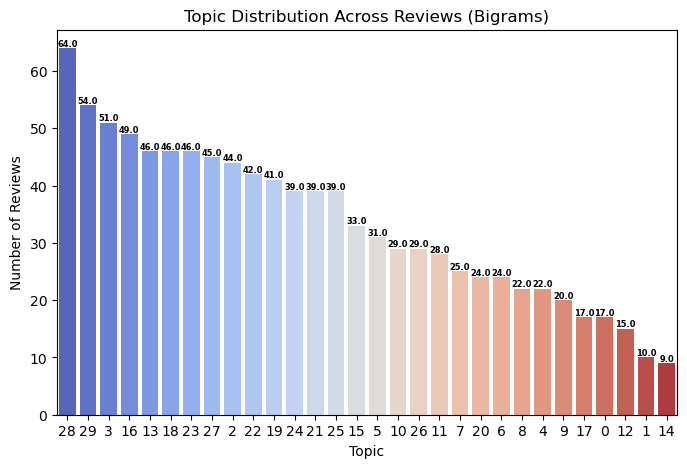

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns

import gensim
from gensim.models import Phrases
from nltk.tokenize import word_tokenize
import nltk

# Download tokenizer
nltk.download('punkt')

# Step 1: Tokenize Reviews
df['tokenized_reviews'] = df['cleaned_reviews'].apply(word_tokenize)

# Step 2: Create Bigrams and Trigrams
bigram = Phrases(df['tokenized_reviews'], min_count=5, threshold=10)  # Adjust threshold if needed

# Apply transformation to generate bigrams and trigrams
df['bigrams'] = df['tokenized_reviews'].apply(lambda x: bigram[x])

# Convert tokens back to text
df['bigrams'] = df['bigrams'].apply(lambda x: " ".join(x))

# Step 3: Vectorize the bigrams
vectorizer_bigrams = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(2,2))  # Only bigrams
tfidf_matrix_bigrams = vectorizer_bigrams.fit_transform(df['bigrams'])

# Step 5: Apply NMF for Topic Modeling for bigrams
num_topics = 30  # Adjust this to find optimal number of topics
nmf_model_bigrams = NMF(n_components=num_topics, random_state=42, max_iter=500)
nmf_topics_bigrams = nmf_model_bigrams.fit_transform(tfidf_matrix_bigrams)

# Step 6: Display the top words for each topic (for bigrams)
feature_names_bigrams = vectorizer_bigrams.get_feature_names_out()

def get_top_words(model, feature_names, num_words=10):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]])
    return top_words

top_words_bigrams = get_top_words(nmf_model_bigrams, feature_names_bigrams)

# Print top words for bigram topics
print("\nTop Words for Bigrams Topics:")
for i, words in enumerate(top_words_bigrams):
    print(f"Topic {i}: {', '.join(words)}")

# Step 8: Assign topics to reviews for bigrams
df['topic_bigrams'] = nmf_topics_bigrams.argmax(axis=1)

# Step 9: Visualize topic distribution for bigrams
topic_order_bigrams = df['topic_bigrams'].value_counts().index

plt.figure(figsize=(8, 5))
ax_bigrams = sns.countplot(x=df['topic_bigrams'], palette="coolwarm", order=topic_order_bigrams)

# Add labels on bars for bigrams
for p in ax_bigrams.patches:
    ax_bigrams.annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='bottom', fontsize=6, fontweight='bold')

plt.title("Topic Distribution Across Reviews (Bigrams)")
plt.xlabel("Topic")
plt.ylabel("Number of Reviews")
plt.show()


